In [1]:
%load_ext tikzmagic
%matplotlib inline

# 스케일링과 다중공선성

In [3]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data

formula_scaled = "medv ~ " \
    "scale(lstat) + scale(rm) + scale(ptratio) + scale(dis) + scale(nox)" \
    "+ C(chas) + scale(black) + scale(zn) + scale(crim) + scale(rad) + scale(tax)"

formula_notscaled = "medv ~ " \
    "lstat + rm + ptratio + dis + nox" \
    "+ C(chas) + black + zn + crim + rad + tax"

result_scaled = sm.OLS.from_formula(formula_scaled, boston).fit()
result_notscaled = sm.OLS.from_formula(formula_notscaled, boston).fit()

In [4]:
print(result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        09:02:45   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3448      0.219    102.

In [5]:
print(result_notscaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        09:02:53   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.3411      5.067      7.171   

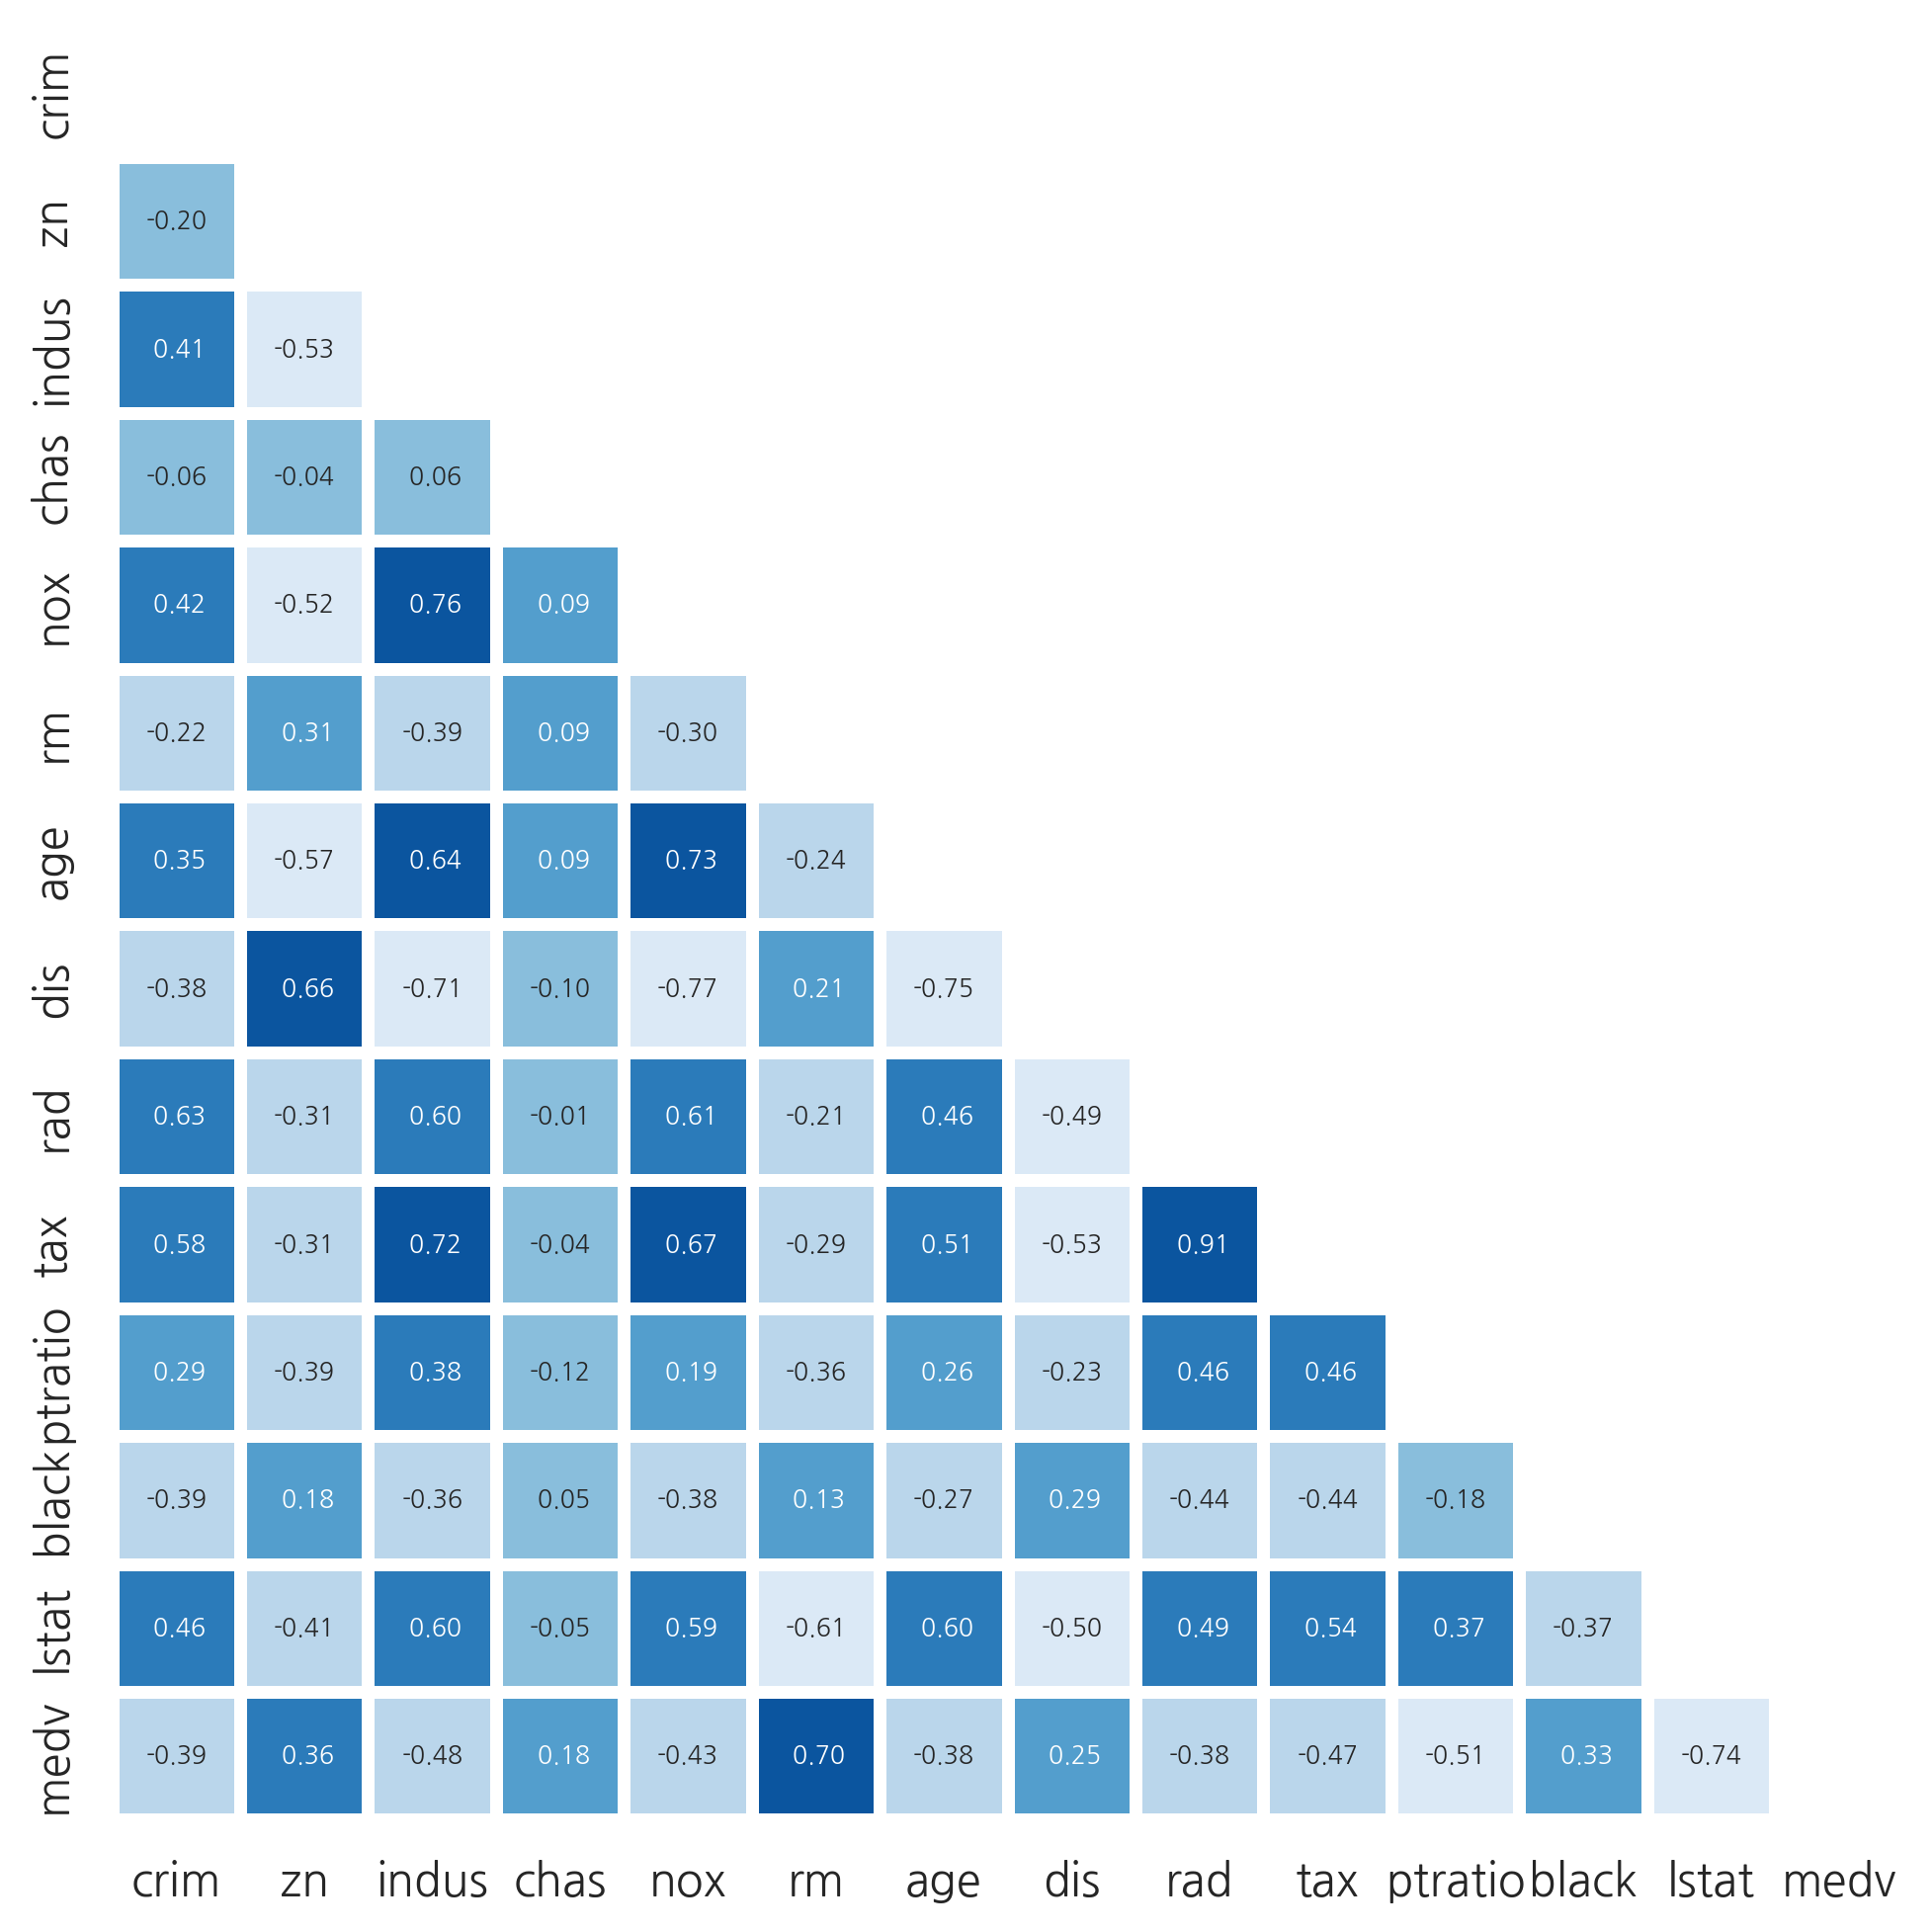

In [19]:
corr = boston.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=np.triu(corr), square=True, linewidths=3, 
            annot=True, fmt="5.2f", annot_kws={"fontsize": 6},
            cmap=sns.color_palette("Blues"), cbar=False)
plt.show()